## Import code

In [ ]:
from src.Data import * # Class containing the data
from src.Assignment import * # Class containing an assignment
from src.Model import * # Class containing a Pulp model used for optimization
from src.ModelColumnGen import * # Class containing Pulp model that optimizes using column generation
from src.ModelFracStable import * # Class containing a Pulp model for finding an fractionally stable stochastic improvement
from src.ModelHeuristicLP import * # Class containing heuristic that will use generated weakly stable matchings as an input
from src.DataGen import * # Generate student preferences and school priorities
from src.DA_STB import * # Generate DA assignment with single tie-breaking (STB)

## Run initial IP on generated data
Specify the number of students and schools, and run the models for this data.

In [2]:
# Generate random data
parameters = DataGenParam(mean_pref = 6, capacity_ratio = 1) # Default parameters, except for mean_pref and capacity_ratio
#MyData = generate_data(n_students=400, n_schools=20, parameters = parameters, name="Test_DataGen", print_data=False, seed = 15)
MyData = generate_data(n_students=5, n_schools=4, parameters = parameters, name="Test_DataGen", print_data=False, seed = 0)

In [ ]:
# Print data if desired
print(MyData)

In [ ]:
# Generate the assignment from DA with Single Tie-Breaking with n_iter samples
n_iter = 1000
A = DA_STB(MyData, n_iter, 0, True)
print(A.assignment)

In [ ]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
    # 'STABLE' refers to maximizing the fraction of STABLE matchings in the decomposition
MyModel = Model(MyData, A, True)
q = MyModel.Solve("IMPR_RANK", "GUROBI", True)
#q = MyModel.Solve("STABLE", "GUROBI", True)

In [ ]:
# Print the solution
MyModel.print_solution()

In [ ]:
# Asses and visualize the difference
diff = Assignment(MyData, q.assignment - A.assignment, "TestDataGen_Diff")
diff.visualize()

## Heuristic subset weakly stable matchings
Runs an LP that minimizes the average rank while stochastically dominating the DA assignment with single-tie breaking, and while only using matchings that were used to compute DA probabilities. This is a heuristic.

In [19]:
# Generate random data
parameters = DataGenParam(mean_pref = 8, capacity_ratio = 1) # Default parameters, except for mean_pref and capacity_ratio
#MyData = generate_data(n_students=400, n_schools=20, parameters = parameters, name="Test_DataGen", print_data=False, seed = 15)
MyData = generate_data(n_students=500, n_schools=25, parameters = parameters, name="500_25", print_data=False, seed = 0)

In [20]:
# Print data if desired
print(MyData)

The data instance has the following properties: 

	500 students.
	25 schools. 

 	PREFERENCES:
	0	5 3 17 7 22 0 13 16 
	1	8 13 9 12 24 16 
	2	13 18 20 19 3 17 22 
	3	22 17 4 3 11 24 14 23 
	4	14 21 16 20 9 23 
	5	10 0 21 19 18 20 16 4 
	6	19 0 8 14 13 5 16 21 
	7	13 21 8 5 22 18 14 4 
	8	19 21 6 18 11 23 
	9	21 9 24 0 7 10 19 
	10	16 14 8 22 4 9 23 
	11	14 23 17 21 6 9 
	12	13 16 14 22 6 23 21 1 0 
	13	10 14 24 2 21 16 4 
	14	13 14 8 10 16 24 17 23 
	15	0 4 3 20 10 18 22 
	16	12 9 21 16 5 3 22 23 20 
	17	16 6 9 14 23 19 8 21 13 
	18	24 13 22 0 18 11 14 7 
	19	23 8 16 17 22 
	20	14 22 16 24 18 23 21 17 
	21	5 6 18 10 14 7 22 23 
	22	6 16 13 22 14 21 17 24 9 
	23	24 13 7 21 9 17 18 
	24	8 0 24 21 6 22 10 11 18 
	25	21 22 4 18 13 10 
	26	21 22 10 5 24 23 8 
	27	22 4 23 19 8 10 16 12 
	28	21 17 7 18 0 5 8 13 
	29	0 23 9 10 14 24 13 16 8 22 
	30	13 3 19 21 12 8 14 16 
	31	24 22 16 6 18 19 2 
	32	13 11 17 20 6 16 24 
	33	0 13 12 16 23 14 
	34	23 16 13 8 22 17 
	35	8 5 6 23 14 22 21 7 
	36	0 

In [21]:
# Generate the assignment from DA with Single Tie-Breaking with n_iter samples
n_iter = 1000
A = DA_STB(MyData, n_iter, 0, True)
print(A.assignment)

Students in ties: 500
Tie-breaking rules needed: 122013682599111006870123878542304692625357434280319284219241358838584537315388199760549644750220328186301361647714820358416337872207817720048078520515932928547790757193933060377296085908627042917454788242491272634430567017327076946106280231045264421887878946575477714986349436778103764427403382736539747138647787849543848959553753799042324106127132698432774571554630997720278101456108118837370953101635632443298702956389662891165897476957208792692887128178007026517450776841071962439039432253642260523494585012991857150124870696156814162535905669342381300885624924689156412677565448188650659384795177536089400574523894033579847636394490531306232374906644504882466507594673586207463792518420045936969298102226397195259719094521782333175693458150855233282076282002340262690789834245171200620771464097945611612762914595123722991334016955236385094288559201872743379517301458635757082835578015873543276888868012039988238470215146760544540766353598417443048

100%|██████████| 1000/1000 [06:52<00:00,  2.43it/s]


[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.227]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.93 ]
 [0.    0.    0.    ... 0.    0.    0.681]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [22]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
MyModel = ModelHeuristicLP(MyData, A, True)
q = MyModel.Solve("IMPR_RANK", "GUROBI", True)
#q = MyModel.Solve("STABLE", "GUROBI", True)


Average rank before optimization: 2.2340020000000003.


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3729 rows, 1001 columns and 2932845 nonzeros
Model fingerprint: 0x7a196cab
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 3075 rows and 1 columns
Presolve time: 0.33s
Presolved: 654 rows, 1000 columns, 395422 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.02s

Barrier statistics:
 AA' NZ     : 2.109e+05
 Factor NZ  : 2.142e+05 (roughly 2 MB of memory)
 Factor Ops : 9.346e+07 (less than 1 second per iteration)
 Threads    : 3

                  Objective                R

In [6]:
# Print the solution
MyModel.print_solution()

The obtained random matching is:
		0	1	2	3	4	5	6	7	
	0	0.000	0.000	0.000	0.000	0.000	0.000	0.264	0.736	
	1	0.000	0.000	1.000	0.000	0.000	0.000	0.000	0.000	
	2	0.000	0.000	0.000	0.000	0.000	0.000	1.000	0.000	
	3	0.736	0.000	0.000	0.000	0.000	0.000	0.000	0.264	
	4	0.000	1.000	0.000	0.000	0.000	0.000	0.000	0.000	
	5	0.000	0.000	0.000	0.000	0.000	0.000	0.000	1.000	
	6	0.000	0.000	0.000	0.000	0.000	1.000	0.000	0.000	
	7	0.264	0.000	0.000	0.000	0.000	0.000	0.736	0.000	
	8	0.000	0.000	0.000	0.000	0.000	0.000	0.000	1.000	
	9	0.000	0.000	1.000	0.000	0.000	0.000	0.000	0.000	
	10	0.000	0.000	0.000	0.000	0.000	1.000	0.000	0.000	
	11	1.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	
	12	0.000	0.000	0.000	0.000	0.000	0.000	0.000	1.000	
	13	0.000	0.000	0.000	1.000	0.000	0.000	0.000	0.000	
	14	0.000	0.000	0.000	0.000	0.000	1.000	0.000	0.000	
	15	0.000	0.000	0.000	0.000	0.000	0.000	1.000	0.000	
	16	0.000	0.000	1.000	0.000	0.000	0.000	0.000	0.000	
	17	0.000	0.000	0.000	0.000	1.000	0.000	0.000	0.000	
	18	

In [29]:
print(np.max(q.assignment-A.assignment))

0.16855363516267124


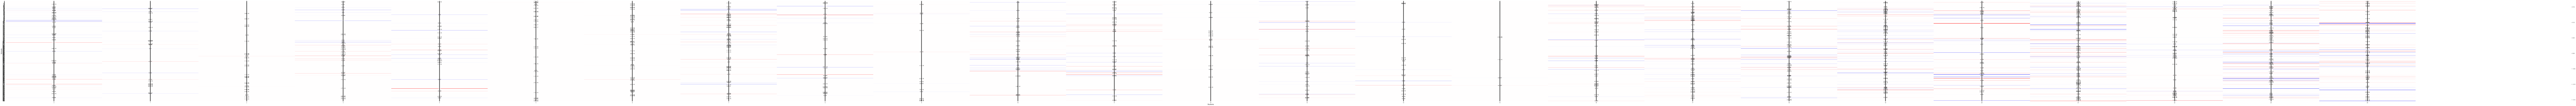

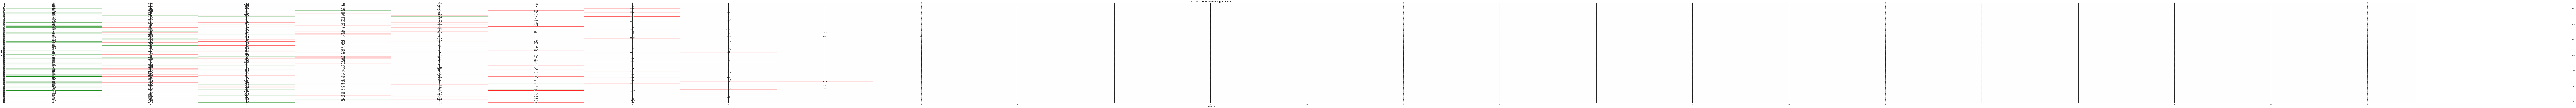

<Figure size 50000x1666.67 with 0 Axes>

In [23]:
# Asses and visualize the difference
diff = Assignment(MyData, q.assignment - A.assignment, "40_12_Diff")
diff.visualize()

## Heuristic Fractional stable random matching

In [ ]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
MyModelFS = ModelFracStable(MyData, A, True)
q = MyModelFS.Solve("IMPR_RANK", "GUROBI", True)
#q = MyModel.Solve("STABLE", "GUROBI", True)

In [ ]:
# FInd decomposition over weakly stable matchings of this fractionally stable matching (if decomposition exists)
MyModelCHECK = Model(MyData, q, True)
q_check = MyModelCHECK.Solve("STABLE", "GUROBI", True)

## Run code manual data
Manually enter data.

In [2]:
# Define preferences of the students
# 'pref[i][k]' contains the position of the k-th ranked school in the preferences.
# We assume the preferences to be strict
# Note that preferences can be strict. We indicate this by a tuple () in the list.

# Example paper
n_stud = 4
n_schools = 4

file_name = "Ex_paper"

# Preferences students
pref = [['1', '3', '4', '2'],
       ['1','4','3','2'],
       # ['1', '4'],
       ['2','3', '4', '1'],
       ['2', '4', '3', '1']]

# Priorities schools
prior = [[('A', 'B'), 'C', 'D'],
        [('C', 'D'), 'A', 'B'],
        ['B', 'D', ('A', 'C')],
        ['A', 'C', ('B', 'D')]]


# Capacities schools
cap = [1,1,1,1]

# Names of students and schools
ID_stud = ["A", "B", "C", "D"]
ID_school = ["1", "2", "3", "4"]

# Also create the random matching upon which we want to improve
p = np.zeros(shape=(n_stud, n_schools))
p[0][0] = 1/2
p[1][0] = 1/2
p[2][1] = 1/2
p[3][1] = 1/2
p[0][2] = 3/8
p[2][2] = 3/8
p[1][3] = 3/8
p[3][3] = 3/8
p[0][3] = 1/8
p[2][3] = 1/8
p[1][2] = 1/8
p[3][2] = 1/8

In [ ]:
# Generate a data instance (and print it)
MyData = Data(n_stud, n_schools, pref, prior, cap, ID_stud, ID_school, file_name)
print(MyData)

In [ ]:
# Generate an Assignment instance (and visualize it)
A = Assignment(MyData, p, "Ex_paper")

# To visualize assignment
A.visualize()

In [ ]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
    # 'STABLE' refers to maximizing the fraction of STABLE matchings in the decomposition
MyModel = Model(MyData, A, False)
q = MyModel.Solve("IMPR_RANK", "GUROBI", False)
#q = MyModel.Solve("STABLE", "GUROBI", True)

In [ ]:
# Print the solution
MyModel.print_solution()

In [ ]:
# Asses and visualize the difference
diff = Assignment(MyData, q.assignment - p, "Ex_paper_Diff")
diff.visualize()

In [ ]:
tuple([1,2])